# PROBLEM STATEMENT
Let's delve into our dataset, which comprises various features such as brand name, rating, skin type, skin tone, eye color, hair color, price, and more.  

Our objective is to develop a robust recommendation system that accurately predicts whether a particular cosmetic product is recommended or not, based on these diverse attributes.  
By leveraging machine learning techniques, we aim to enhance the decision-making process for consumers seeking personalized cosmetic recommendations.

# **FEATURE DESCRIPTION**  
**Product_info data content**  

**product_id**	        The unique identifier for the product from the site  
**product_name**	    The full name of the product  
**brand_id**	        The unique identifier for the product brand from the site  
**brand_name**        The full name of the product brand  
**loves_count**	        The number of people who have marked this product as a favorite  
**rating**	            The average rating of the product based on user reviews  
**reviews**	            The number of user reviews for the product  
**size**	            The size of the product, which may be in oz, ml, g, packs, or other units depending on the product type  
**variation_type**	    The type of variation parameter for the product (e.g. Size, Color)  
**variation_value**	    The specific value of the variation parameter for the product (e.g. 100 mL, Golden Sand)  
**variation_desc**	    A description of the variation parameter for the product (e.g. tone for fairest skin)  
**ingredients**	        A list of ingredients included in the product, for example: [‘Product variation 1:’, ‘Water, Glycerin’, ‘Product variation 2:’, ‘Talc, Mica’] or if no variations [‘Water, Glycerin’]  
**price_usd**	        The price of the product in US dollars  
**value_price_usd**	    The potential cost savings of the product, presented on the site next to the regular price  
**sale_price_usd**	    The sale price of the product in US dollars  
**limited_edition**	    Indicates whether the product is a limited edition or not (1-true, 0-false)  
**new**	                Indicates whether the product is new or not (1-true, 0-false)  
**online_only**	        Indicates whether the product is only sold online or not (1-true, 0-false)  
**out_of_stock**	    Indicates whether the product is currently out of stock or not (1 if true, 0 if false)  
**sephora_exclusive**	Indicates whether the product is exclusive to Sephora or not (1 if true, 0 if false)  
**highlights**	        A list of tags or features that highlight the product's attributes (e.g. [‘Vegan’, ‘Matte Finish’])  
**primary_category**	First category in the breadcrumb section  
**secondary_category**	Second category in the breadcrumb section  
**tertiary_category**	Third category in the breadcrumb section  
**child_count**	        The number of variations of the product available  
**child_max_price**	    The highest price among the variations of the product  
**child_min_price**	    The lowest price among the variations of the product  



**Reviews data content**  
**author_id**	                The unique identifier for the author of the review on the website  
**rating**	                    The rating given by the author for the product on a scale of 1 to 5  
**is_recommended**	            Indicates if the author recommends the product or not (1-true, 0-false)  
**helpfulness**	        The ratio of all ratings to positive ratings for the review: helpfulness = total_pos_feedback_count / total_feedback_count  
**total_feedback_count**	    Total number of feedback (positive and negative ratings) left by users for the review  
**total_neg_feedback_count**	The number of users who gave a negative rating for the review  
**total_pos_feedback_count**	The number of users who gave a positive rating for the review  
**submission_time**	            Date the review was posted on the website in the 'yyyy-mm-dd' format  
**review_text**	                The main text of the review written by the author  
**review_title**	            The title of the review written by the author  
**skin_tone**	                Author's skin tone (e.g. fair, tan, etc.)  
**eye_color**	                Author's eye color (e.g. brown, green, etc.)  
**skin_type**	                Author's skin type (e.g. combination, oily, etc.)  
**hair_color**	                Author's hair color (e.g. brown, auburn, etc.)  
**product_id**	                The unique identifier for the product on the website  

# **IMPORT LIBRAIRIES**

In [38]:
import random

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


# **LOAD DATA**

In [2]:
df_product_info = pd.read_csv("product_info.csv")
df_reviews_1 = pd.read_csv("reviews_0-250.csv",index_col = 0, dtype={'author_id':'str'})
df_reviews_2 = pd.read_csv("reviews_250-500.csv",index_col = 0, dtype={'author_id':'str'})
df_reviews_3 = pd.read_csv("reviews_500-750.csv",index_col = 0, dtype={'author_id':'str'})
df_reviews_4 = pd.read_csv("reviews_750-1250.csv",index_col = 0, dtype={'author_id':'str'})
df_reviews_5 = pd.read_csv("reviews_1250-end.csv",index_col = 0, dtype={'author_id':'str'})

In [3]:
print("df_product_info shape is: ",df_product_info.shape)
print("\n")
print("Columns of df_product_info are:", df_product_info.columns)
print("\n")
df_product_info.head()

df_product_info shape is:  (8494, 27)


Columns of df_product_info are: Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')




,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [4]:
# Concat df_reviews_1 till df_reviews_5
df_reviews = pd.concat([df_reviews_1,df_reviews_2,df_reviews_3,df_reviews_4,df_reviews_5],axis=0)
print("df_reviews shape is: ",df_reviews.shape)
df_reviews.head()

df_reviews shape is:  (1094411, 18)


,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [5]:
# Lets check similar columns between df_product_info and df_reviews
cols_keep = [col for col in df_product_info.columns if col not in df_reviews.columns]
cols_keep.append('product_id')
cols_count = len(cols_keep)

cols_out = [col for col in df_product_info.columns if col in df_reviews.columns]
cols_out.append('product_id')
cols_count_out = len(cols_out)

print("Number of columns to cols_out:", cols_count_out)
print("Columns to drop:", cols_out)
print("\n")
print("Number of columns to cols_keep:", cols_count)
print("Columns to drop:", cols_keep)

Number of columns to cols_out: 6
Columns to drop: ['product_id', 'product_name', 'brand_name', 'rating', 'price_usd', 'product_id']


Number of columns to cols_keep: 23
Columns to drop: ['brand_id', 'loves_count', 'reviews', 'size', 'variation_type', 'variation_value', 'variation_desc', 'ingredients', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category', 'secondary_category', 'tertiary_category', 'child_count', 'child_max_price', 'child_min_price', 'product_id']


In [6]:
# Display all columns
pd.set_option('display.max_columns', None)

# Merge the DataFrames df_reviews and df_product_info
data = pd.merge(df_reviews, df_product_info[cols_keep], how='inner', on=['product_id', 'product_id'])
print("df_product_info shape is: ",df_product_info.shape)
print("\n")
print("Columns of df are:", data.columns)
print("\n")
# Filter rows where primary_category is 'Skincare'
#df_skincare = df[df['primary_category'] == 'Skincare']

data.head()

df_product_info shape is:  (8494, 27)


Columns of df are: Index(['author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd', 'brand_id',
       'loves_count', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'value_price_usd', 'sale_price_usd',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')




,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,brand_id,loves_count,reviews,size,variation_type,variation_value,variation_desc,ingredients,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,7055,177,1.0,2.4 oz / 70 ml,Size,2.4 oz / 70 ml,NaN,"['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...",NaN,NaN,0,0,1,0,0,['Clean at Sephora'],Skincare,Cleansers,NaN,0,NaN,NaN
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,6125,1081315,16118.0,0.7 oz/ 20 g,Color,Original,NaN,"['Diisostearyl Malate, Hydrogenated Polyisobut...",NaN,NaN,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,6125,1081315,16118.0,0.7 oz/ 20 g,Color,Original,NaN,"['Diisostearyl Malate, Hydrogenated Polyisobut...",NaN,NaN,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,6125,1081315,16118.0,0.7 oz/ 20 g,Color,Original,NaN,"['Diisostearyl Malate, Hydrogenated Polyisobut...",NaN,NaN,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,6125,1081315,16118.0,0.7 oz/ 20 g,Color,Original,NaN,"['Diisostearyl Malate, Hydrogenated Polyisobut...",NaN,NaN,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0


In [7]:
# Make a backup of the dataset
df = data.copy()

# **EXPLORATORY DATA ANALYSIS**

Some columns are of interest for our recommendation system, namely:
- is_recommended
- brand_name
- rating
- skin_type
- skin_tone
- eye_color
- hair_color
- price_usd
- product_name
- loves_count
- highlights
- secondary_category
- tertiary_category
- total_feedback (count + negative + positive)

## TOP 10 PRODUCTS

In [15]:
# print percentage of both is_recommended present
print("Positive labels percentage", round(df.is_recommended.value_counts()[1]/len(df) *100 ,2), "%")
print("Negative labels percentage", round(df.is_recommended.value_counts()[0]/len(df) *100 ,2), "%")

Positive labels percentage 71.11 %
Negative labels percentage 13.55 %


In [16]:
# Count the occurrences of each "is_recommended" value
is_recommended_sum = df.groupby(['product_id','product_name']).sum(numeric_only=True)['is_recommended']

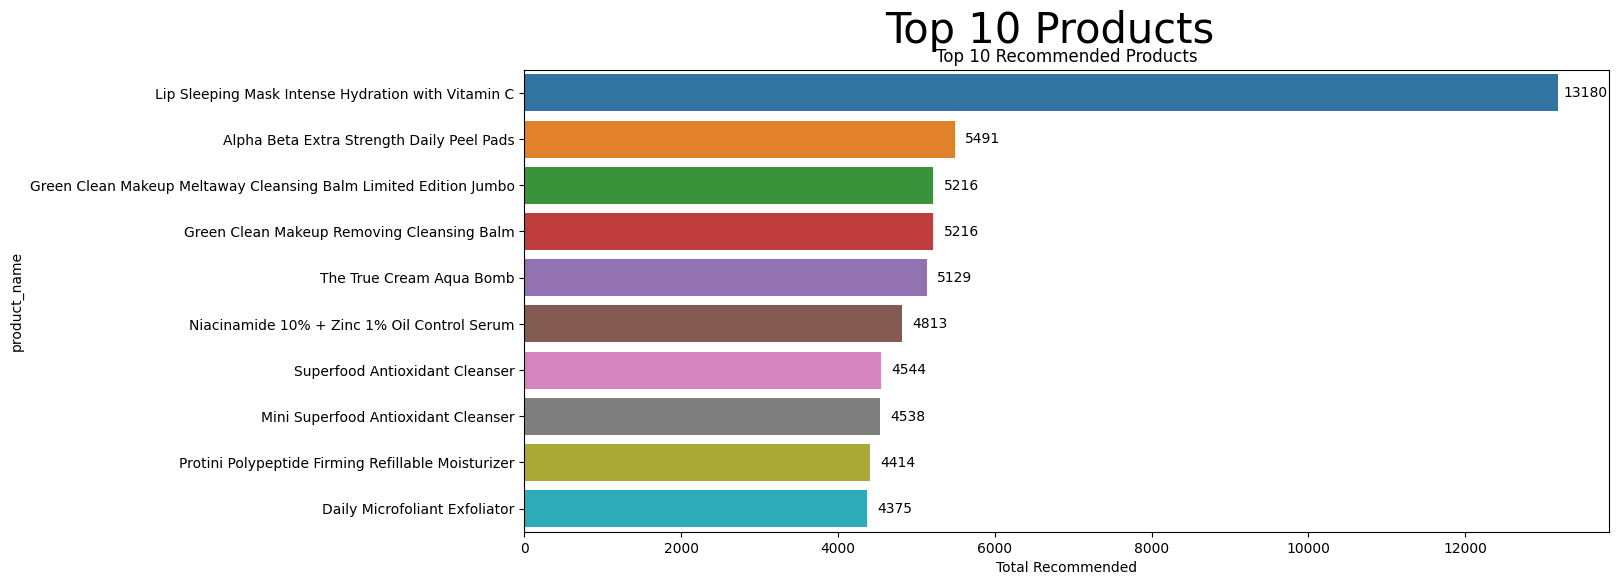

In [18]:
# Top 10 products
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
fig.subplots_adjust(hspace=0.5)

# Sorting and selecting top 10 recommended products
top_10_is_recommended = is_recommended_sum.reset_index().sort_values('is_recommended', ascending=False).head(10)
sns.barplot(data=top_10_is_recommended, x='is_recommended', y='product_name', ax=ax1, hue='product_name', estimator=sum)
ax1.set_title("Top 10 Recommended Products")
ax1.set_xlabel("Total Recommended")

# Adding count to each bar in the first plot
for p in ax1.patches:
    ax1.annotate(format(p.get_width(), '.0f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (20, 0), 
                  textcoords = 'offset points')

plt.suptitle("Top 10 Products", fontsize=30)
plt.show()


## TOP 10 BRAND_NAME

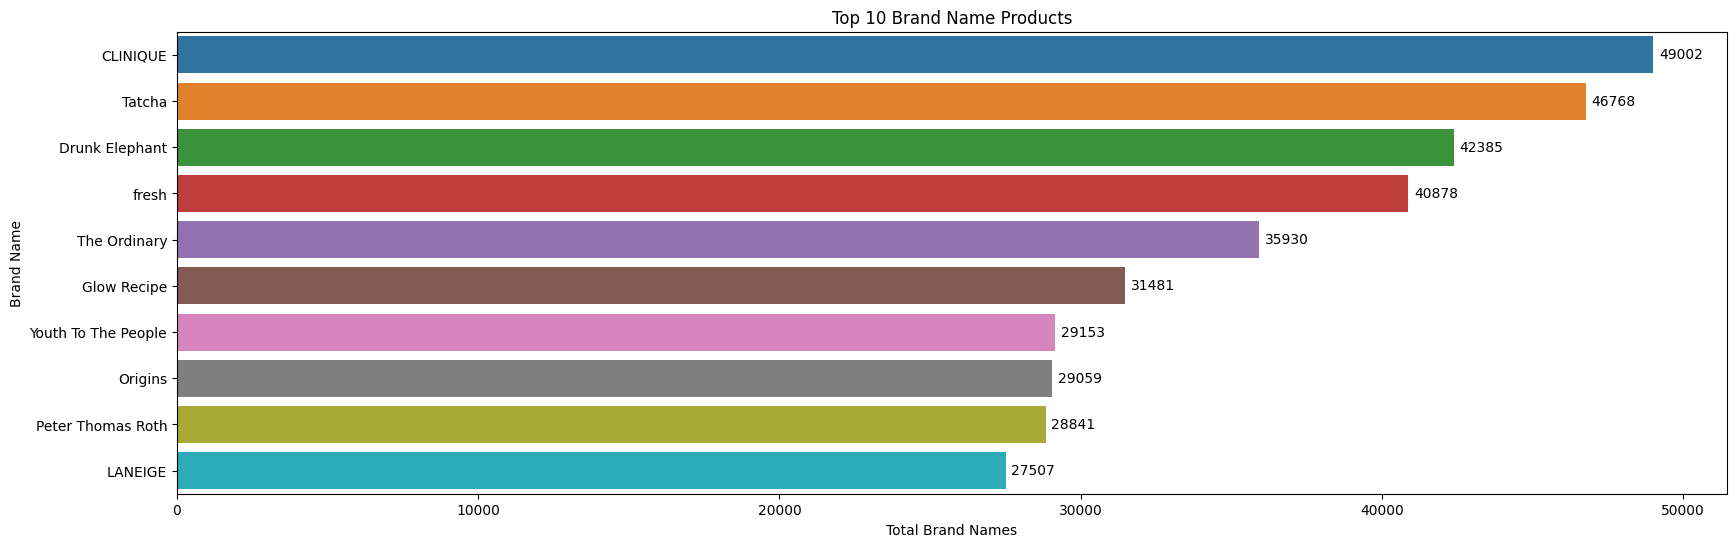

In [19]:
# Count the occurrences of each "brand_name" value
brand_name_counts = df['brand_name'].value_counts().reset_index()
brand_name_counts.columns = ['brand_name', 'brand_name_count']
top_10_brand_names = brand_name_counts.sort_values(by='brand_name_count', ascending=False).head(10)

# Sorting and selecting top 10 brand names
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=top_10_brand_names, x='brand_name_count', y='brand_name', hue='brand_name', dodge=False)
ax.set_title("Top 10 Brand Name Products")
ax.set_xlabel("Total Brand Names")
ax.set_ylabel("Brand Name")

# Adding count to each bar
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', 
                xytext=(20, 0), 
                textcoords='offset points')

plt.show()


## TOP RATING / BRAND_NAME

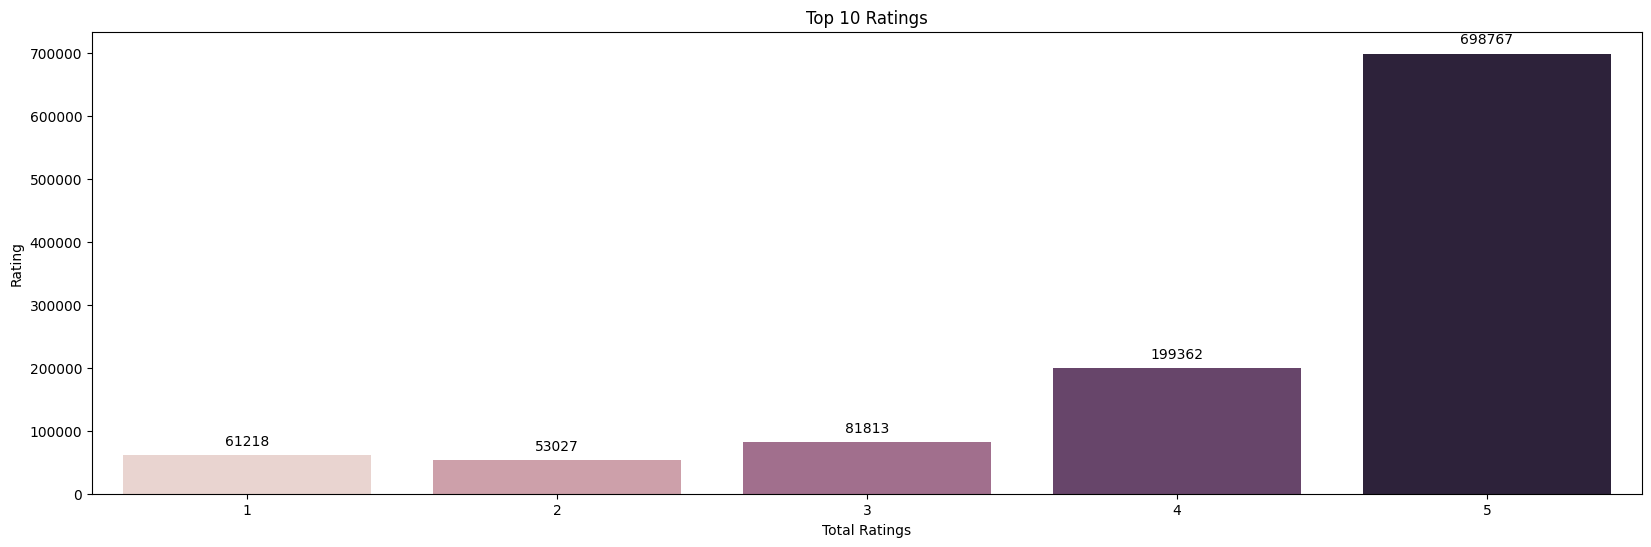

In [20]:
# Count the occurrences of each "rating" value
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'rating_count']
top_10_rating = rating_counts.sort_values(by='rating_count', ascending=False).head(10)

# Sorting and selecting ratings
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=top_10_rating, x='rating', y='rating_count', hue='rating', dodge=False, legend=False)
ax.set_title("Top 10 Ratings")
ax.set_xlabel("Total Ratings")
ax.set_ylabel("Rating")

# Adding count to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()



In [21]:
# Group by rating and brand_name and count the products
rating_brand_count = df.groupby(['rating', 'brand_name']).size().reset_index(name='product_count')

# Find the top brand for each rating value
top_brands_per_rating = rating_brand_count.loc[rating_brand_count.groupby('rating')['product_count'].idxmax()]

fig = go.Figure()
# Add data for each rating value
for rating in top_brands_per_rating['rating'].unique():
    subset = top_brands_per_rating[top_brands_per_rating['rating'] == rating]
    fig.add_trace(go.Bar(
        x=subset['brand_name'],
        y=subset['product_count'],
        name=f'Rating {rating}',
        text=subset['product_count'],
        textposition='auto')
                  )

# Update the layout of the graph
fig.update_layout(
    title='Top Brands for Each Rating',
    xaxis_title='Brand Name',
    yaxis_title='Product Count',
    barmode='group'
    )

fig.show()


## TOTAL _FEEDBACK (Count + Negative + Positive)

In [22]:
# Convert 'submission_time' to datetime and extract the year
df['submission_time'] = pd.to_datetime(df['submission_time'])
df['year'] = df['submission_time'].dt.year

# Group by year and calculate the sums
total_feedback = df.groupby('year').sum(numeric_only=True)['total_feedback_count'].reset_index()
total_pos_feedback = df.groupby('year').sum(numeric_only=True)['total_pos_feedback_count'].reset_index()
total_neg_feedback = df.groupby('year').sum(numeric_only=True)['total_neg_feedback_count'].reset_index()

# Create the figure
fig = go.Figure()

# Add the data for each feedback series
fig.add_trace(go.Scatter(x=total_feedback['year'], y=total_feedback['total_feedback_count'],
                        mode='lines+markers', name='Total all feedback', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=total_pos_feedback['year'], y=total_pos_feedback['total_pos_feedback_count'],
                        mode='lines+markers', name='Total Positive Feedback', line=dict(color='green')))
fig.add_trace(go.Scatter(x=total_neg_feedback['year'], y=total_neg_feedback['total_neg_feedback_count'],
                        mode='lines+markers', name='Total Negative Feedback', line=dict(color='red')))

# Format the axes
fig.update_layout(
    yaxis=dict(
        title='Total feedback in Thousands',
        tickformat=',.0f'),
    xaxis=dict(
        title='Years'),
    legend=dict(
        x=0.01,
        y=0.99,
        bgcolor='rgba(255,255,255,0)',
        bordercolor='rgba(255,255,255,0)')
    )

fig.show()

# Display the maximum year
max_year = df['year'].max()
print("The maximum year in the DataFrame is:", max_year)


The maximum year in the DataFrame is: 2023


## TOP PRODUCT_NAME BY SKIN_TYPE AND RATING

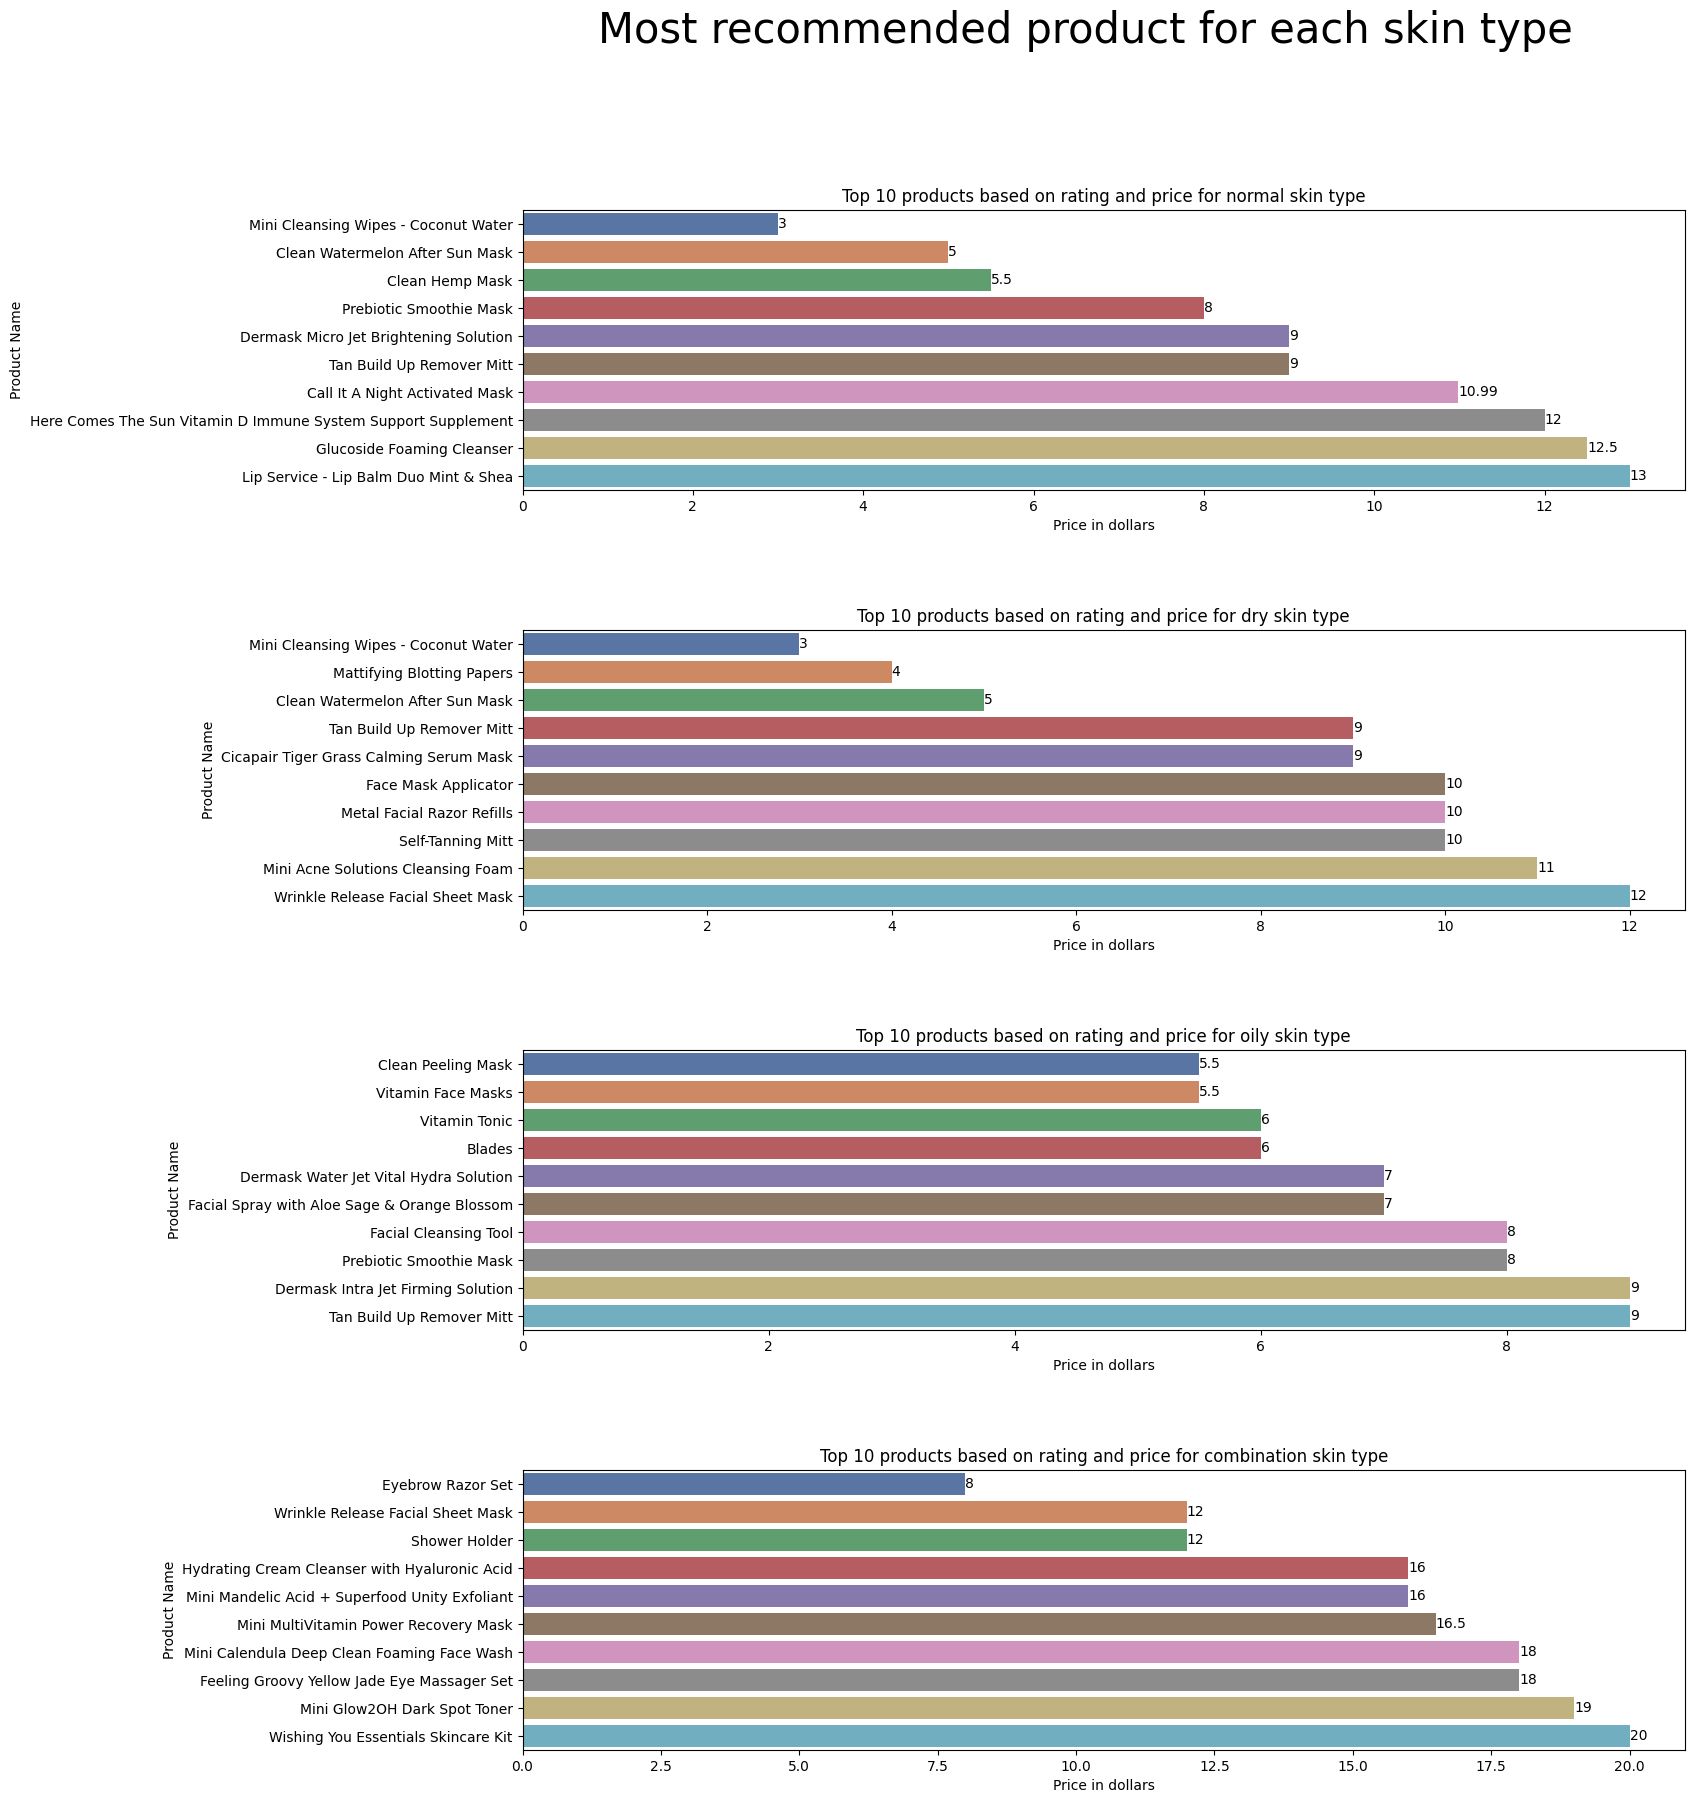

In [23]:
# Group by skin_type, product_id, product_name, and price_usd, and calculate the mean rating
product_skin = df.groupby(['skin_type', 'product_id', 'product_name', 'price_usd']).mean(numeric_only=True).reset_index()

# Define skin types
skin_types = ['normal', 'dry', 'oily', 'combination']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Iterate over each skin type
for i, skin_type in enumerate(skin_types):
    # Filter data for the current skin type
    skin_data = product_skin[product_skin['skin_type'] == skin_type]
    # Sort the data by rating and then by price
    skin_data = skin_data.sort_values(by=['rating', 'price_usd'], ascending=[False, True]).head(10)
    # Create a bar plot
    sns.barplot(data=skin_data, x='price_usd', y='product_name', ax=axes[i], hue='product_name', palette='deep', dodge=False, legend=False)
    axes[i].set_title(f"Top 10 products based on rating and price for {skin_type} skin type")
    axes[i].set_ylabel("Product Name")
    axes[i].set_xlabel("Price in dollars")
    # Add labels to the bars
    for container in axes[i].containers:
        axes[i].bar_label(container)

# Set the main title
fig.suptitle("Most recommended product for each skin type", fontsize=30)

plt.show()


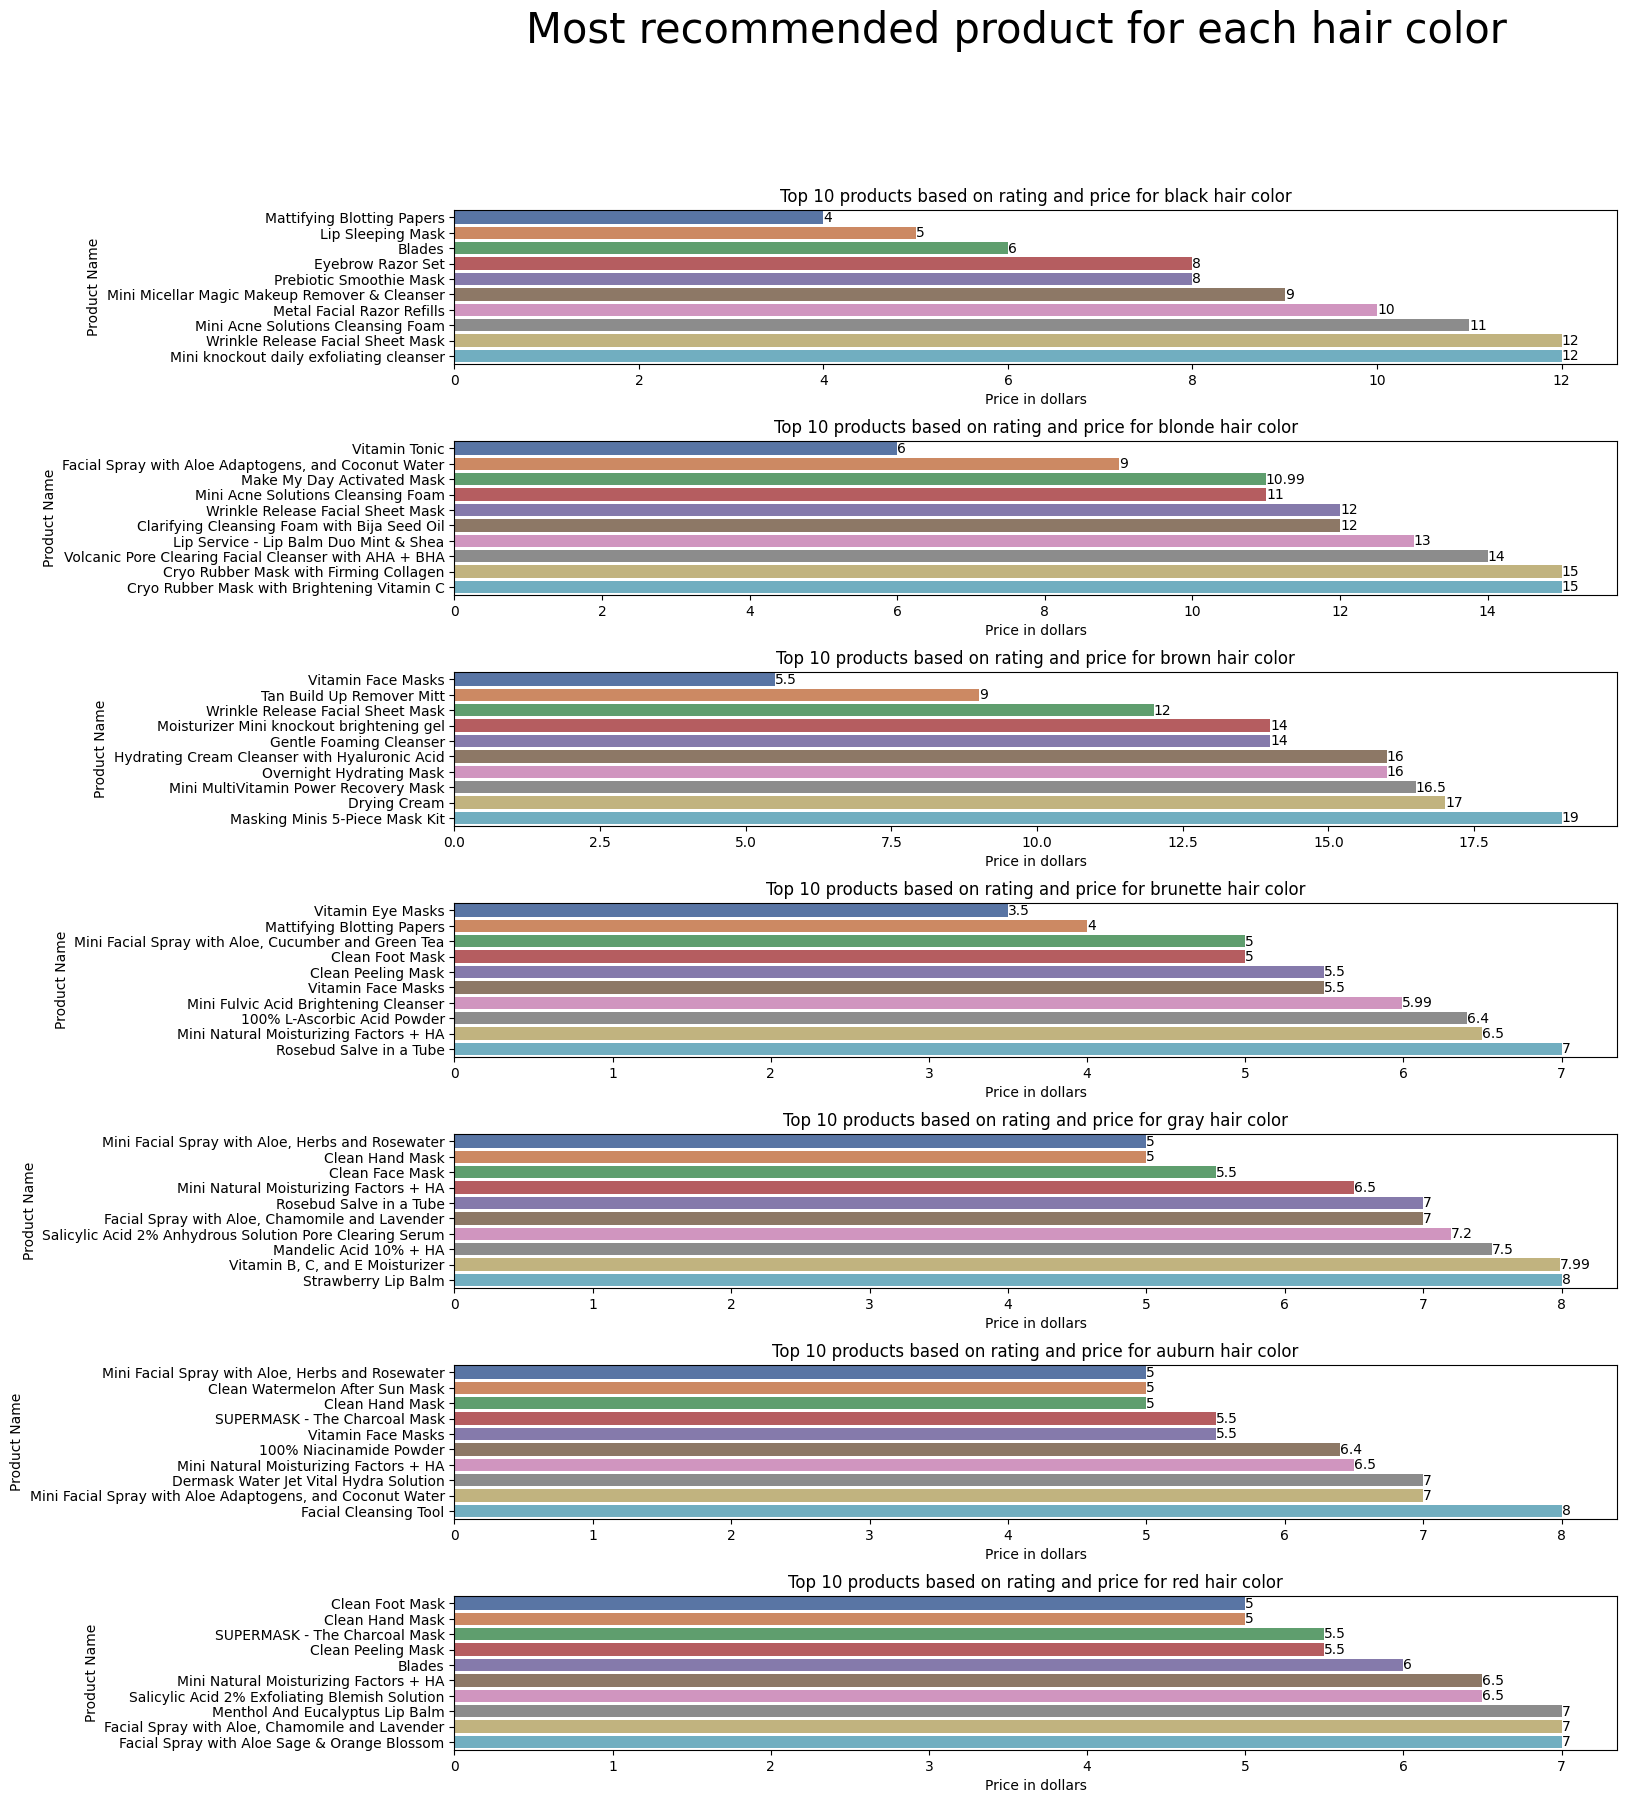

In [24]:
# Group by hair_color, product_id, product_name, and price_usd, and calculate the mean rating
product_hair = df.groupby(['hair_color', 'product_id', 'product_name', 'price_usd']).mean(numeric_only=True).reset_index()

# Define skin types
hair_colors = ['black', 'blonde', 'brown', 'brunette', 'gray', 'auburn', 'red']

# Create subplots
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Iterate over each skin type
for i, hair_color in enumerate(hair_colors):
    # Filter data for the current skin type
    hair_data = product_hair[product_hair['hair_color'] == hair_color]
    # Sort the data by rating and then by price
    hair_data = hair_data.sort_values(by=['rating', 'price_usd'], ascending=[False, True]).head(10)
    # Create a bar plot
    sns.barplot(data=hair_data, x='price_usd', y='product_name', ax=axes[i], hue='product_name', palette='deep', dodge=False, legend=False)
    axes[i].set_title(f"Top 10 products based on rating and price for {hair_color} hair color")
    axes[i].set_ylabel("Product Name")
    axes[i].set_xlabel("Price in dollars")
    # Add labels to the bars
    for container in axes[i].containers:
        axes[i].bar_label(container)

# Set the main title
fig.suptitle("Most recommended product for each hair color", fontsize=30)

plt.show()

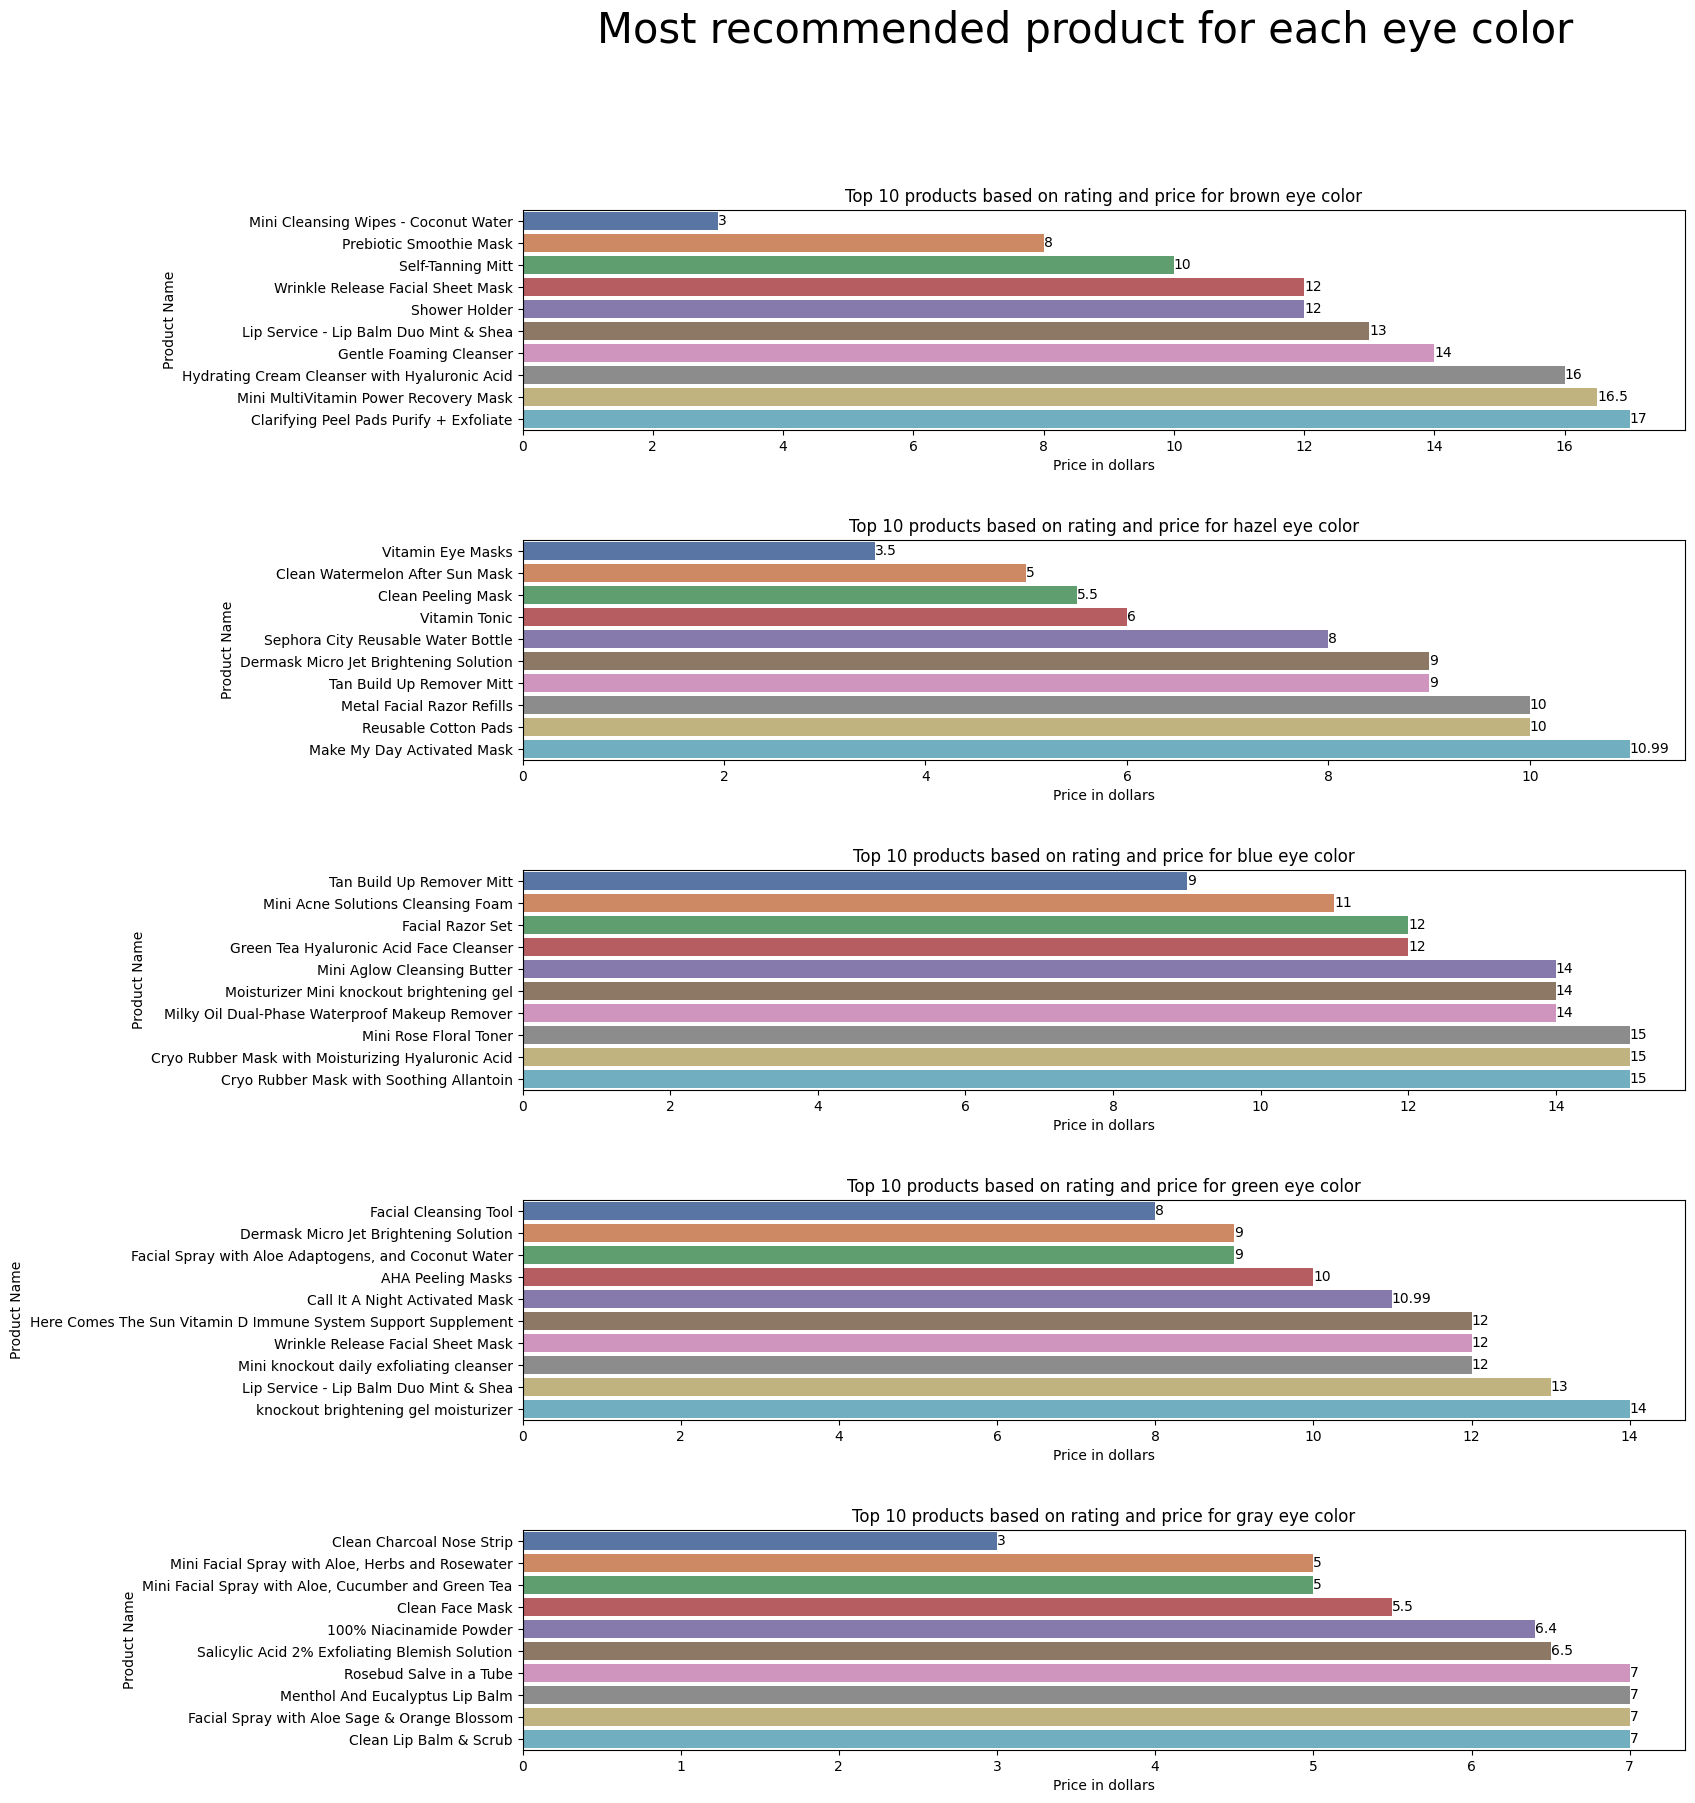

In [16]:
# eplacing 'Grey' with 'gray' in the 'eye_color' column
df['eye_color'] = df['eye_color'].replace('Grey','gray') 

# Group by eye_color, product_id, product_name, and price_usd, and calculate the mean rating
product_eye = df.groupby(['eye_color', 'product_id', 'product_name', 'price_usd']).mean(numeric_only=True).reset_index()

# Define eye colors
eye_colors = ['brown', 'hazel', 'blue', 'green', 'gray']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Iterate over each eye color
for i, eye_color in enumerate(eye_colors):
    # Filter data for the current eye color
    eye_data = product_eye[product_eye['eye_color'] == eye_color]
    # Sort the data by rating and then by price
    eye_data = eye_data.sort_values(by=['rating', 'price_usd'], ascending=[False, True]).head(10)
    # Create a bar plot
    sns.barplot(data=eye_data, x='price_usd', y='product_name', ax=axes[i], hue='product_name', palette='deep', dodge=False, legend=False)
    axes[i].set_title(f"Top 10 products based on rating and price for {eye_color} eye color")
    axes[i].set_ylabel("Product Name")
    axes[i].set_xlabel("Price in dollars")
    # Add labels to the bars
    for container in axes[i].containers:
        axes[i].bar_label(container)

# Set the main title
fig.suptitle("Most recommended product for each eye color", fontsize=30)

plt.show()


In [15]:
# Replace 'notSureST' values with NaN in the 'skin_tone' column
df['skin_tone'] = df['skin_tone'].replace('notSureST', np.nan)

# **DATA PREPROCESSING**

In [8]:
# Display unique values for each column
def display_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)
        print("\n" + "-"*50 + "\n")

# Call the function with your DataFrame
display_unique_values(df)


Unique values in column 'author_id':
['1741593524' '31423088263' '5061282401' ... '6696895228' '42434587408'
 '11519076605']

--------------------------------------------------

Unique values in column 'rating':
[5 1 4 2 3]

--------------------------------------------------

Unique values in column 'is_recommended':
[ 1.  0. nan]

--------------------------------------------------

Unique values in column 'helpfulness':
[1.                nan 0.25       ... 0.182927   0.265625   0.90131599]

--------------------------------------------------

Unique values in column 'total_feedback_count':
[   2    0    1    8    9   11    3    5    4    6   16   18    7   10
   17   19   21   22   15   14   25   20   59   12   13  209   51   36
   50   26   31   44   24   39   32   27   28   35   52   23   38   63
   74  147   34   29   67   45   60   33   30   55   43   37   53   54
   80  281   49  243   92 5464   76   57   70  188   41   66  450 1033
  101 1053  421   48  248   56  135  110   75 5

In [ ]:
# Create a DataFrame with the number of unique values for each categorical column
unique_values_df = pd.DataFrame({"Number of unique values": data.select_dtypes(include="object").nunique()})
unique_values_df.sort_values("Number of unique values")

## HANDLING DUPLICATES VALUES

In [9]:
# Check for perfect duplicates in the DataFrame
duplicate_df = df[df.duplicated(keep=False)]

# Display the result
if len(duplicate_df) > 0:
    print("There are {} duplicate rows in the DataFrame.".format(len(duplicate_df)))
    print("\nDuplicate Rows:")
else:
    print("There are no duplicate rows in the DataFrame.")

duplicate_df

There are 373 duplicate rows in the DataFrame.

Duplicate Rows:


,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,brand_id,loves_count,reviews,size,variation_type,variation_value,variation_desc,ingredients,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
5338,1150759844,5,1.0,NaN,0,0,0,2020-06-26,I bought this after I tried a sample. It’s ver...,NaN,deep,brown,combination,red,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,6125,1081315,16118.0,0.7 oz/ 20 g,Color,Original,NaN,"['Diisostearyl Malate, Hydrogenated Polyisobut...",NaN,NaN,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
5339,1150759844,5,1.0,NaN,0,0,0,2020-06-26,I bought this after I tried a sample. It’s ver...,NaN,deep,brown,combination,red,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,6125,1081315,16118.0,0.7 oz/ 20 g,Color,Original,NaN,"['Diisostearyl Malate, Hydrogenated Polyisobut...",NaN,NaN,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
5476,1604550515,5,1.0,NaN,0,0,0,2020-06-15,My lips are smooth & full! This feels wonderfu...,Full Baby Lips,mediumTan,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,6125,1081315,16118.0,0.7 oz/ 20 g,Color,Original,NaN,"['Diisostearyl Malate, Hydrogenated Polyisobut...",NaN,NaN,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
5477,1604550515,5,1.0,NaN,0,0,0,2020-06-15,My lips are smooth & full! This feels wonderfu...,Full Baby Lips,mediumTan,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,6125,1081315,16118.0,0.7 oz/ 20 g,Color,Original,NaN,"['Diisostearyl Malate, Hydrogenated Polyisobut...",NaN,NaN,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
7241,2003943527,5,1.0,NaN,0,0,0,2020-02-20,I love this lip mask! i use it twice a week an...,The Softest lips!!,olive,brown,oily,brunette,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,6125,1081315,16118.0,0.7 oz/ 20 g,Color,Original,NaN,"['Diisostearyl Malate, Hydrogenated Polyisobut...",NaN,NaN,0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999758,5447763758,5,1.0,NaN,0,0,0,2022-06-05,I really enjoy this product! It has a thinner...,NaN,tan,brown,combination,brown,P500039,The Neck Serum - With 5 Peptides | 9% Peptide ...,Nécessaire,60.0,6323,21558,226.0,1.7 oz / 50 mL,Size,1.7 oz / 50 mL,NaN,"['Aqua/Water/Eau, Glycerin, Propanediol, Dicap...",NaN,NaN,0,0,1,0,0,"['Vegan', 'Clean + Planet Positive', 'Collagen...",Skincare,Moisturizers,Decollete & Neck Creams,0,NaN,NaN
1008267,10379330825,5,1.0,NaN,0,0,0,2021-04-06,I appreciate that this toner is unscented beca...,NaN,fair,brown,combination,black,P469818,Cactus Water Cleansing Lactic Acid Toner,Freck Beauty,32.0,6347,10510,209.0,6.5 oz/ 192 mL,Size,6.5 oz/ 192 mL,NaN,"['Water/Aqua/Eau, Glycerin, Butylene Glycol, L...",NaN,NaN,0,0,0,0,0,"['Vegan', 'Good for: Dullness/Uneven Texture',...",Skincare,Cleansers,Toners,0,NaN,NaN
1008268,10379330825,5,1.0,NaN,0,0,0,2021-04-06,I appreciate that this toner is unscented beca...,NaN,fair,brown,combination,black,P469818,Cactus Water Cleansing Lactic Acid Toner,Freck Beauty,32.0,6347,10510,209.0,6.5 oz/ 192 mL,Size,6.5 oz/ 192 mL,NaN,"['Water/Aqua/Eau, Glycerin, Butylene Glycol, L...",NaN,NaN,

In [10]:
# Drop perfect duplicates
df.drop_duplicates(inplace=True)

# Check for remaining duplicates after the drop
remaining_duplicates = df.duplicated().sum()

# Display the result
if remaining_duplicates > 0:
    print("There are {} remaining duplicates in the DataFrame after the drop.".format(remaining_duplicates))
else:
    print("There are no remaining duplicates in the DataFrame after the drop.")

There are no remaining duplicates in the DataFrame after the drop.


## HANDLING MISSING VALUES

In [11]:
# Create a dictionary to store information about null values
null_info_dict = {'Column_Name': [], 'Total_Count': [], 'Null_Count': [], 'Total_Non_Null_Count': [], 'Null_Percentage': [], 'Data_Type': []}

# Fill the dictionary with information about null values for each column
for column in df.columns:
    total_count = len(df)
    null_count = df[column].isnull().sum()
    total_non_null_count = total_count - null_count
    null_percentage = (null_count / total_count) * 100
    data_type = df[column].dtype
    
    null_info_dict['Column_Name'].append(column)
    null_info_dict['Total_Count'].append(total_count)
    null_info_dict['Null_Count'].append(null_count)
    null_info_dict['Total_Non_Null_Count'].append(total_non_null_count)
    null_info_dict['Null_Percentage'].append(null_percentage)
    null_info_dict['Data_Type'].append(data_type)

# Create a DataFrame from the dictionary
null_info = pd.DataFrame(null_info_dict)

# Sort the DataFrame by the percentage of null values in descending order
null_info = null_info.sort_values(by='Null_Percentage', ascending=False)

# Display the resulting DataFrame
print("Percentage of null values for each column:\n")
null_info


Percentage of null values for each column:



,Column_Name,Total_Count,Null_Count,Total_Non_Null_Count,Null_Percentage,Data_Type
24,variation_desc,1094187,1085906,8281,99.243182,object
27,sale_price_usd,1094187,1084434,9753,99.108653,float64
26,value_price_usd,1094187,1063313,30874,97.178362,float64
38,child_max_price,1094187,640885,453302,58.571798,float64
39,child_min_price,1094187,640885,453302,58.571798,float64
3,helpfulness,1094187,561466,532721,51.313532,float64
9,review_title,1094187,310625,783562,28.388658,object
13,hair_color,1094187,226649,867538,20.713918,object
11,eye_color,1094187,209510,884677,19.147550,object
10,skin_tone,1094187,170428,923759,15.575765,object


In [12]:
# Descriptive analysis of numerical attributes
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
rating,1094187.0,4.299077,1.149490,1.0,4.000000,5.000000,5.0,5.0
is_recommended,926314.0,0.839954,0.366649,0.0,1.000000,1.000000,1.0,1.0
helpfulness,532721.0,0.767891,0.317057,0.0,0.653846,0.928571,1.0,1.0
total_feedback_count,1094187.0,4.177699,22.717509,0.0,0.000000,0.000000,3.0,5464.0
total_neg_feedback_count,1094187.0,0.894813,5.289416,0.0,0.000000,0.000000,1.0,1159.0
total_pos_feedback_count,1094187.0,3.282886,19.676779,0.0,0.000000,0.000000,3.0,5050.0
price_usd,1094187.0,49.008741,40.044392,3.0,25.000000,39.000000,62.0,1900.0
brand_id,1094187.0,5548.457254,1492.075948,1063.0,5626.000000,6073.000000,6234.0,8017.0
loves_count,1094187.0,106854.392113,167688.064416,0.0,16656.000000,48796.000000,123439.0,1081315.0
reviews,1094187.0,2160.837572,2526.421092,1.0,552.000000,1350.000000,2911.0,16118.0


**Interpretation**  
 Based on the provided information, we can draw the following conclusions:  

*Categorical values* :  
1. `author_id`: There are 503 216 unique author IDs.
2. `submission_time`: The earliest submission on 2020-06-11.
3. `skin_tone`: There are 14 distinct categories for skin tones.
4. `eye_color`: There are 6 different types classifications for eye color values.
5. `skin_type`: There are 14 unique classifications for skin tone values.
6. `hair_color`: There are 7 different types for hair color values. 
7. `product_name`: There are 2334 unique product names.
8. `brand_name`: There are 142 unique brand names.
9. `size`: There are 517 unique product size.
10. `primary_category`: There is only skincare category after merge.
11. `secondary_category`: There is 13 different secondary categories.
12. `tertiary_category`: There is 30 different tertiary categories.

*Numerical values*:
1. `rating`: The mean rating is 4.29 with a rating scale between 1 and 5, indicating a hogh satifaction among customers from this dataset.
2. `total_feedback_count`, `total_neg_feedback_count`, `total_pos_feedback_count`: Only the top 25% of the data contains values, indicating that feedback is given by just 25% of customers.
3. `price_usd`: The average price of products in the dataset is around $49.32 with a standard deviation of $39.34, there is a significant range in product prices. The prices span from a minimum of $3.00 to a maximum of $1900.00. Most product prices are concentrated between $25.00 and $62.00, as shown by the 25th, 50th, and 75th percentiles.
4. `loves_count`: On average, products receive about 106,861 loves, but this can range from 0 to over a million. The high standard deviation indicates significant differences in popularity among products. Most products have between 16,656 and 123,439 loves, highlighting a wide distribution in the dataset.
5. `reviews`: On average, products receive around 2,160 reviews, but this number can range from just 1 to as many as 16,118 reviews. The standard deviation of approximately 2,527 indicates that the number of reviews can vary widely from the mean. Most products tend to have between 552 and 2,911 reviews, as reflected by the interquartile range (25th to 75th percentiles).
6. `value_price_usd`: The average price is approximately $115.15, with a standard deviation of $62.17, indicating moderate price fluctuations among the products. The minimum price is $20.00, while the maximum is $480.00. Most product prices fall between $68.00 and $142.00, as shown by the 25th, 50th, and 75th percentiles.
7. `sale_price_usd`: On average, products are priced at approximately $16.84 during sales, with a standard deviation of $13.93, indicating notable fluctuations in sale prices. The minimum sale price is $3.00, while the maximum is $320.00. Most sale prices range between $7.00 and $20.00, as indicated by the 25th, 50th, and 75th percentiles.

In [14]:
# Extract numerical data from the DataFrame
df_num = df.select_dtypes(include=[np.number])
print("Numerical columns:")
print(df_num.columns)

# Extract categorical data from the DataFrame
df_cat = df.select_dtypes(include=object)
print("Categorical columns:")
print(df_cat.columns)

Numerical columns:
Index(['rating', 'is_recommended', 'helpfulness', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd',
       'brand_id', 'loves_count', 'reviews', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'child_count', 'child_max_price',
       'child_min_price'],
      dtype='object')
Categorical columns:
Index(['author_id', 'submission_time', 'review_text', 'review_title',
       'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id',
       'product_name', 'brand_name', 'size', 'variation_type',
       'variation_value', 'variation_desc', 'ingredients', 'highlights',
       'primary_category', 'secondary_category', 'tertiary_category'],
      dtype='object')


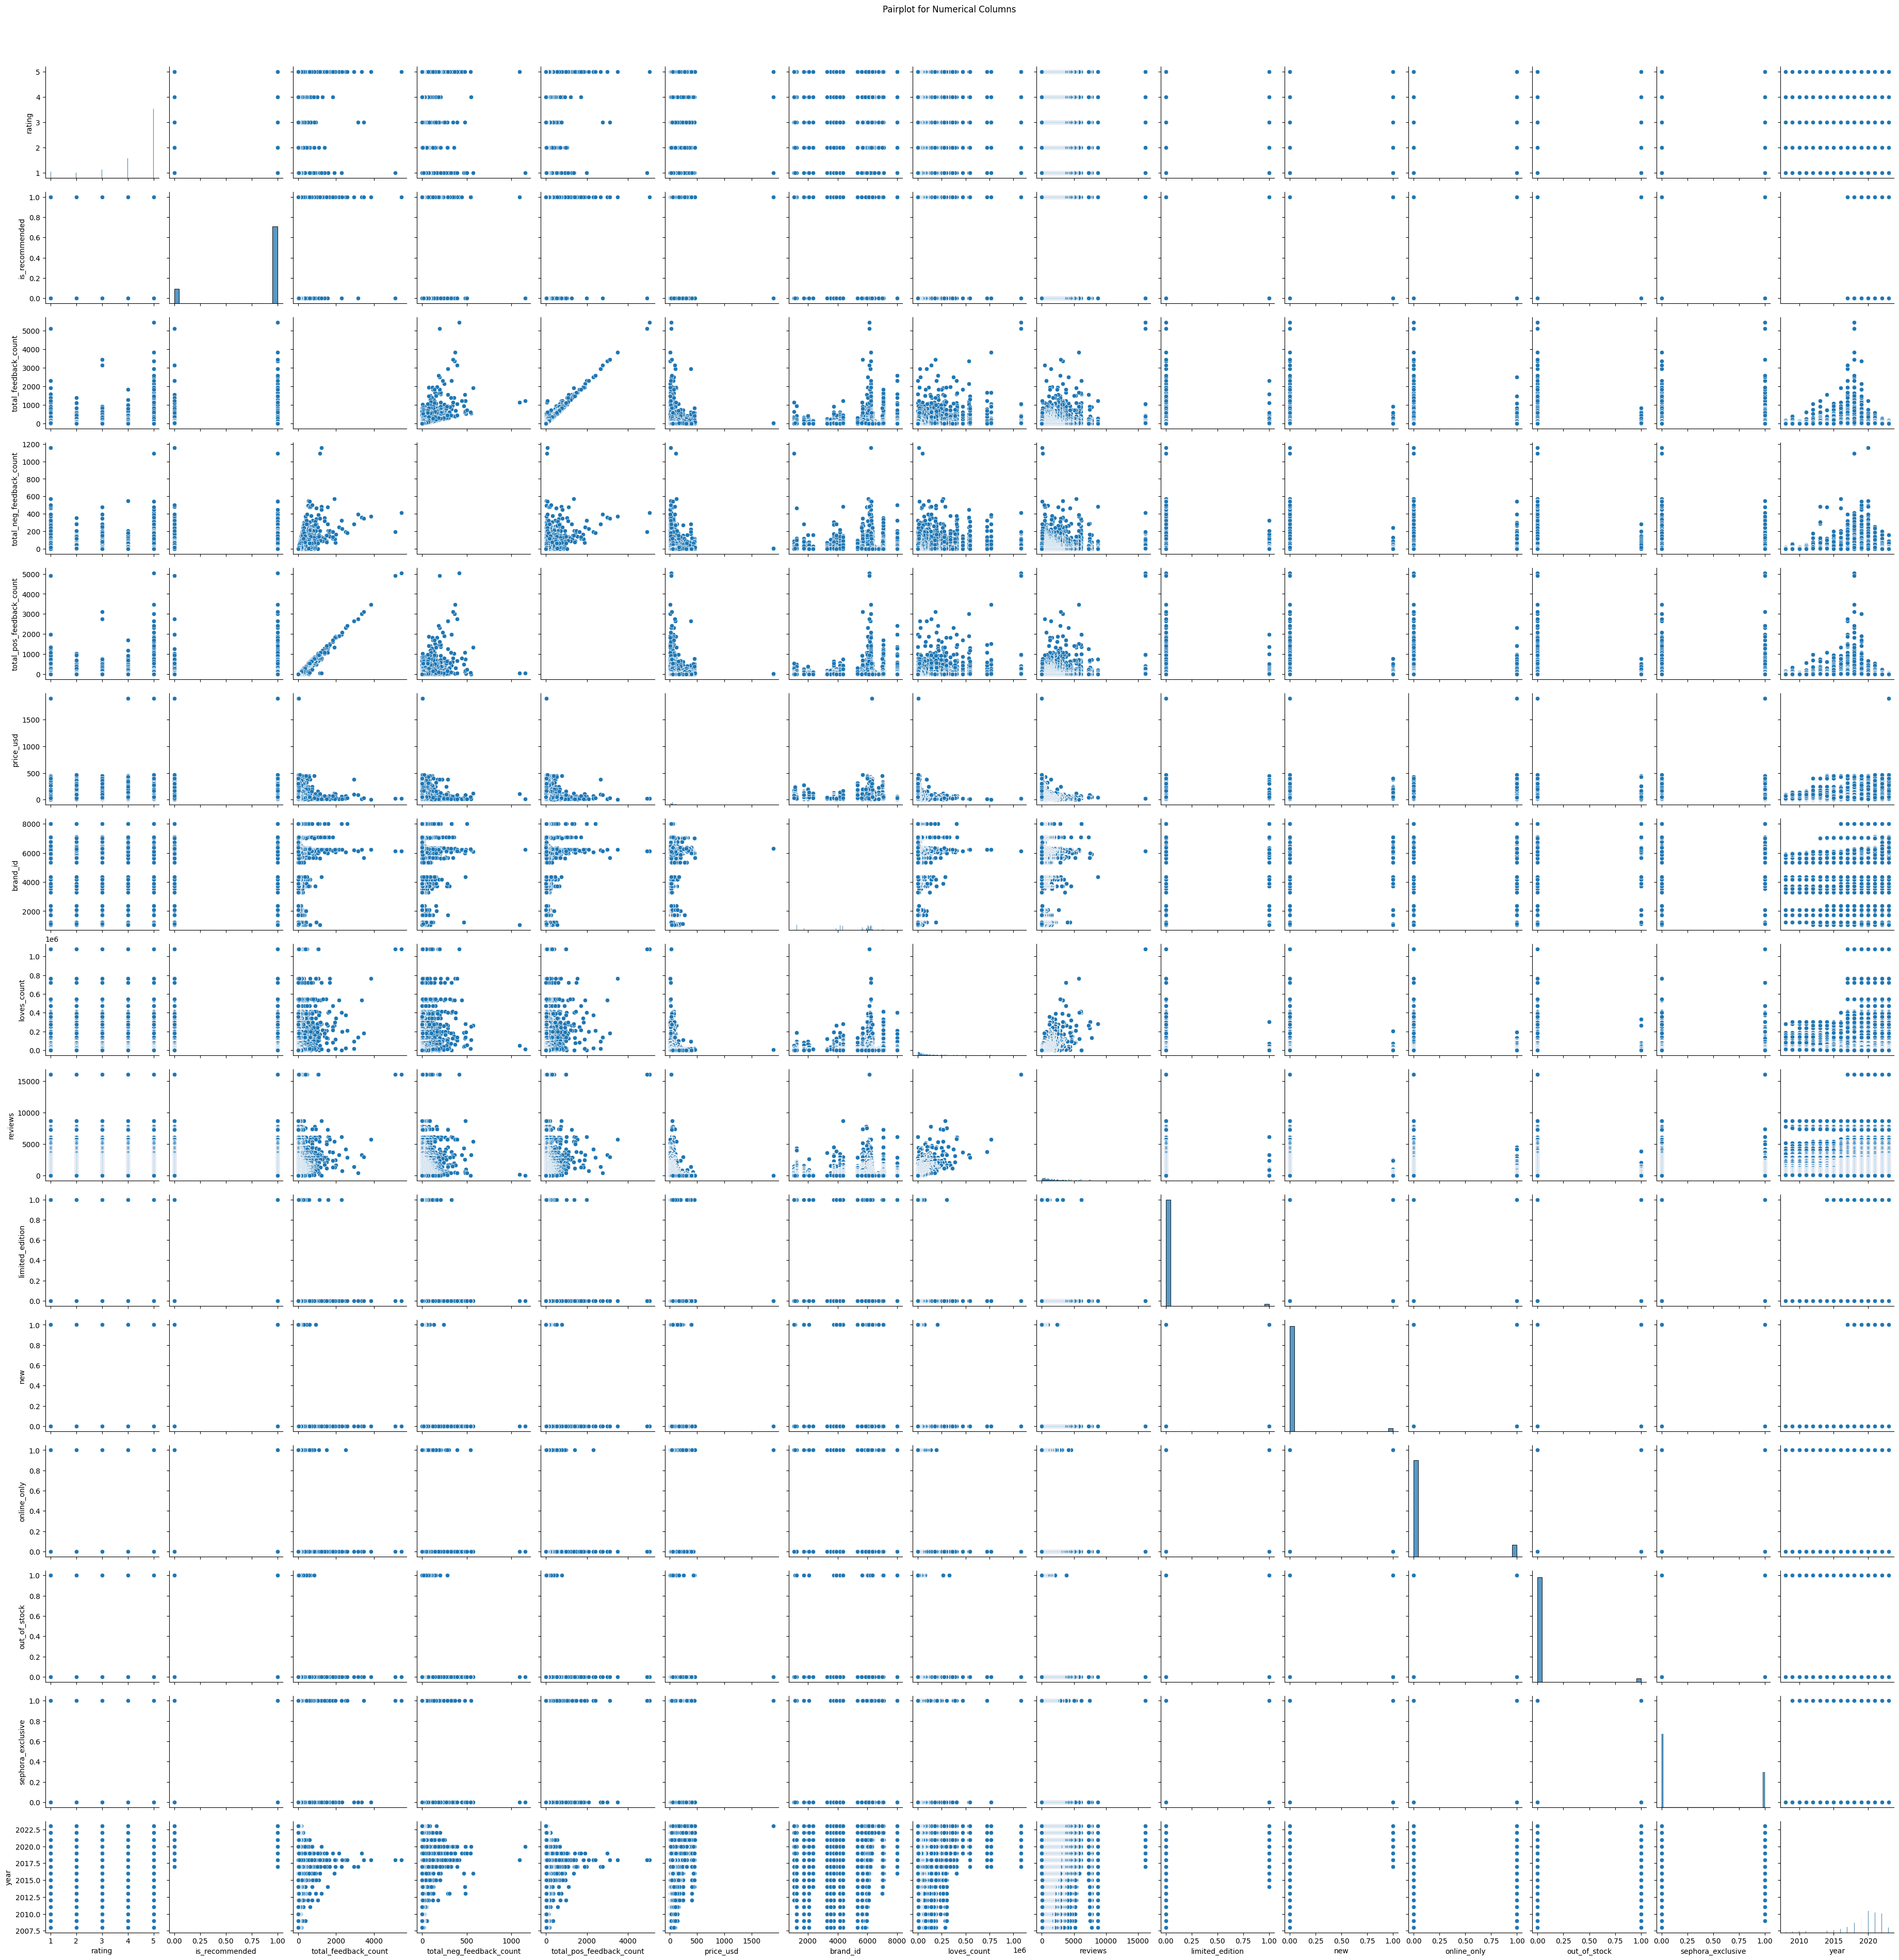

In [27]:
# Scatter plots
sns.pairplot(df_num)
plt.suptitle('Pairplot for Numerical Columns', y=1.02)
plt.show()

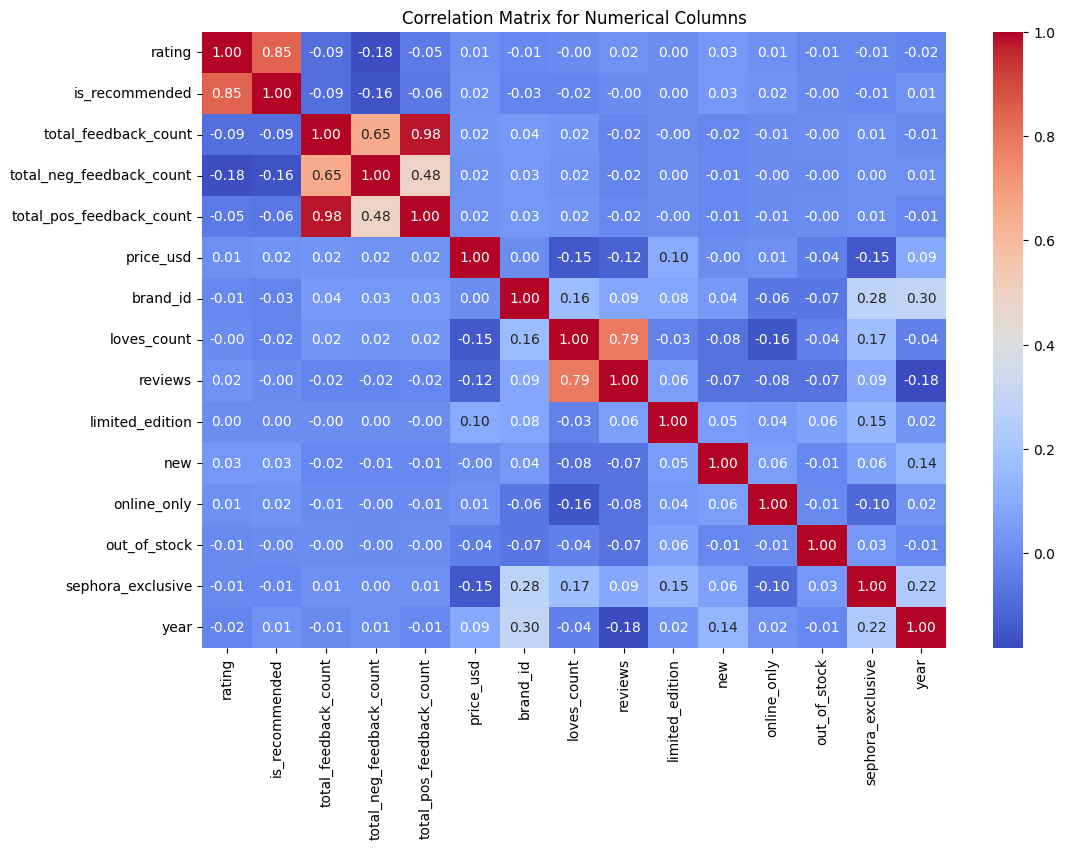

In [42]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

In [15]:
# Calculate skewness for each numerical variable in df_num
skewness = df_num.skew()
print("Skewness:")
print(skewness)


Skewness:
rating                      -1.676760
is_recommended              -1.854387
helpfulness                 -1.342962
total_feedback_count        68.376108
total_neg_feedback_count    48.195768
total_pos_feedback_count    78.276903
price_usd                    3.982749
brand_id                    -1.512919
loves_count                  3.656354
reviews                      2.949180
value_price_usd              1.776968
sale_price_usd               8.962430
limited_edition              7.524407
new                          5.890188
online_only                  2.493291
out_of_stock                 5.359424
sephora_exclusive            0.750879
child_count                  3.325910
child_max_price              3.398259
child_min_price              3.671349
dtype: float64


Brief interpretation for each variable based on its skewness:

- Rating: Slightly left-skewed.
- Is Recommended: Highly left-skewed.
- Total Feedback Count: Highly right-skewed.
- Total Negative Feedback Count: Highly right-skewed.
- Total Positive Feedback Count: Highly right-skewed.
- Price USD: Moderately right-skewed.
- Brand ID: Slightly left-skewed.
- Loves Count: Moderately right-skewed.
- Reviews: Moderately right-skewed.
- Limited Edition: Highly right-skewed.
- New: Highly right-skewed.
- Online Only: Moderately right-skewed.
- Out of Stock: Highly right-skewed.
- Sephora Exclusive: Slightly right-skewed.
- Year: Slightly left-skewed.

Drop columns with more than 20% missing values as they provide limited information:   
"value_price_usd," "sale_price_usd," "variation_desc," "child_min_price," "child_max_price,", "child_count", "helpfulness," and "review_title."

In [17]:
print("Old shape of df is: ", df.shape)
new_df = df.drop(columns=["value_price_usd", "sale_price_usd", "variation_desc", "child_min_price", "child_max_price", "child_count", "helpfulness", "review_title"], inplace=False)
df = new_df.copy()
print("New shape of new_df is: ", new_df.shape)
print("New shape of copied_df is: ", df.shape)

Old shape of df is:  (1094187, 40)
New shape of new_df is:  (1094187, 32)
New shape of copied_df is:  (1094187, 32)


## FINAL HANDLING MISSING VALUES

In [18]:
# Finding out portion of null value in each column
df.isnull().mean().sort_values(ascending=True)

author_id                   0.000000
primary_category            0.000000
sephora_exclusive           0.000000
out_of_stock                0.000000
online_only                 0.000000
new                         0.000000
limited_edition             0.000000
reviews                     0.000000
loves_count                 0.000000
brand_id                    0.000000
secondary_category          0.000000
brand_name                  0.000000
product_name                0.000000
price_usd                   0.000000
rating                      0.000000
product_id                  0.000000
submission_time             0.000000
total_pos_feedback_count    0.000000
total_neg_feedback_count    0.000000
total_feedback_count        0.000000
review_text                 0.001320
ingredients                 0.020128
size                        0.039621
variation_type              0.047023
variation_value             0.057969
skin_type                   0.101856
highlights                  0.104051
t

In [20]:
# Fill missing values in binary column with mode
df['is_recommended'] = df['is_recommended'].fillna(df['is_recommended'].mode()[0])

# Fill missing values in categorical columns with mode
categorical_columns = ['skin_tone', 'eye_color', 'hair_color', 'variation_type', 'variation_value', 'skin_type', 'highlights', 'tertiary_category']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing values in text columns with empty string
df['review_text'] = df['review_text'].fillna('')

# Fill missing values in other columns with mode
other_columns = ['ingredients', 'size']
for col in other_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Finding out portion of null value in each column
df.isnull().mean().sort_values(ascending=True)

author_id                   0.0
primary_category            0.0
highlights                  0.0
sephora_exclusive           0.0
out_of_stock                0.0
online_only                 0.0
new                         0.0
limited_edition             0.0
ingredients                 0.0
variation_value             0.0
variation_type              0.0
size                        0.0
reviews                     0.0
loves_count                 0.0
brand_id                    0.0
price_usd                   0.0
brand_name                  0.0
product_name                0.0
product_id                  0.0
hair_color                  0.0
skin_type                   0.0
eye_color                   0.0
skin_tone                   0.0
review_text                 0.0
submission_time             0.0
total_pos_feedback_count    0.0
total_neg_feedback_count    0.0
total_feedback_count        0.0
is_recommended              0.0
rating                      0.0
secondary_category          0.0
tertiary

# **DATA MODELING**

In [49]:
# Séparation des données en features et target
X = df[['brand_name', 'rating', 'skin_type', 'skin_tone', 'eye_color', 'hair_color', 'price_usd', 'loves_count', 'highlights', 'secondary_category', 'tertiary_category', 'total_feedback_count']]
y = df['is_recommended']

# Encodage des variables catégorielles supplémentaires si nécessaire
categorical_columns = ['skin_type', 'skin_tone', 'eye_color', 'hair_color', 'highlights', 'secondary_category', 'tertiary_category']

for column in categorical_columns:
    if X[column].dtype == 'object':
        label_encoder = LabelEncoder()
        X[column] = label_encoder.fit_transform(X[column])

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construction du modèle de recommandation
model = RandomForestClassifier()

# Ajuster le modèle
model.fit(X_train, y_train)

# Prédictions
predictions = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9614829234410843
Precision: 0.9805936679667988
Recall: 0.9747663896973763
F1 Score: 0.9776713457325489


In [ ]:
## WARNING : The cell is running for a long time

# Define the hyperparameter grid to search
# param_grid = {
#    'n_estimators': [50, 100, 200],
#    'max_depth': [None, 10, 20],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

# Create the RandomForestClassifier model
#rf_model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
#grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the search for the best parameters
#grid_search.fit(X_train, y_train)

# Display the best parameters
#print("Best parameters found:")
#print(grid_search.best_params_)

# Get the best model
#best_model = grid_search.best_estimator_

# Predictions with the best model
#best_predictions = best_model.predict(X_test)

# Evaluation of the best model
#accuracy_best = accuracy_score(y_test, best_predictions)
#precision_best = precision_score(y_test, best_predictions)
#recall_best = recall_score(y_test, best_predictions)
#f1_best = f1_score(y_test, best_predictions)

#print("\nPerformance of the best model:")
#print("Accuracy:", accuracy_best)
#print("Precision:", precision_best)
#print("Recall:", recall_best)
#print("F1 Score:", f1_best)

In [52]:
# Sélection aléatoire d'un exemple dans le DataFrame
random.seed(42)  # Pour reproduire les mêmes résultats
random_index = random.randint(0, len(df) - 1)
example = df.iloc[random_index]

# Extraction des caractéristiques de l'exemple
example_features = example[['brand_name', 'rating', 'skin_type', 'skin_tone', 'eye_color', 'hair_color', 'price_usd', 'loves_count', 'highlights', 'secondary_category', 'tertiary_category', 'total_feedback_count']].values.reshape(1, -1)

# Prédiction avec le modèle
prediction = model.predict(example_features)

# Création d'un DataFrame pour afficher les informations du produit
product_info = pd.DataFrame({
    'Product': [example['product_name']],
    'Brand': [example['brand_name']],
    'Rating': [example['rating']],
    'Skin Type': [example['skin_type']],
    'Skin Tone': [example['skin_tone']],
    'Eye Color': [example['eye_color']],
    'Hair Color': [example['hair_color']],
    'Price (USD)': [example['price_usd']],
    'Loves Count': [example['loves_count']],
    'Highlights': [example['highlights']],
    'Secondary Category': [example['secondary_category']],
    'Tertiary Category': [example['tertiary_category']],
    'Total Feedback Count': [example['total_feedback_count']],
    'Recommended': ['Yes' if prediction[0] == 1 else 'No']
})

# Valeur de recommandation réelle
true_recommendation = example['is_recommended']

# Vérification de l'exactitude de la prédiction
if prediction[0] == true_recommendation:
    print("La prédiction est correcte.")
else:
    print("La prédiction est incorrecte.")
    
# Affichage du DataFrame d'informations sur le produit
print("Informations sur le produit:")
display(product_info)

# Affichage du DataFrame d'informations du produit dans le DataFrame original
print("\nInformations du produit dans le DataFrame original:")
display(pd.DataFrame(example).transpose())

La prédiction est correcte.
Informations sur le produit:


/Users/jennyferwan/env_lib/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,Product,Brand,Rating,Skin Type,Skin Tone,Eye Color,Hair Color,Price (USD),Loves Count,Highlights,Secondary Category,Tertiary Category,Total Feedback Count,Recommended
0,2033.0,120.0,4.0,0.0,3.0,1.0,2.0,70.0,388775.0,904.0,6.0,25.0,1.0,Yes



Informations du produit dans le DataFrame original:


,author_id,rating,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,brand_id,loves_count,reviews,size,variation_type,variation_value,ingredients,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category
233530,321458.0,4.0,1.0,1.0,0.0,1.0,4360.0,781775.0,3.0,1.0,0.0,2.0,707.0,2033.0,120.0,70.0,6041.0,388775.0,3148.0,205.0,2.0,181.0,467.0,0.0,0.0,0.0,0.0,1.0,904.0,0.0,6.0,25.0
